# Using seurat to get differentially expressed genes in each cluster

Since we did all the pre-processing steps manually, we will have to rerun them here in the seurat object. Notice the steps: 1) create object 2) normalize data 3) find variable genes 4) scale data 5) run PCA 6) run tSNE 7) find clusters. We are not going to talk about any of these commands since this was done manually already. Copy and paste until the FindMarkers section!

In [1]:
library(Seurat)

Loading required package: ggplot2
Loading required package: cowplot

Attaching package: 'cowplot'

The following object is masked from 'package:ggplot2':

    ggsave

Loading required package: Matrix


In [2]:
input_dir = 'inputs/'
output_dir = 'outputs/'

In [3]:
data = read.csv(
    paste0(input_dir,'counts_filtered.csv'),
    row.names=1
)

dim(data)
head(data)

[1] 5065 1660

,AAACATTGTTTGGG.1,AAACCGTGCCAAGT.1,AAACGCACAGCCTA.1,AAACGCACCAGATC.1,AAACGCACCGCCTT.1,AAACGCACCGTAGT.1,AAACGGCTGATAGA.1,AAACTTGAAGAGTA.1,AAACTTGACCACAA.1,AAAGACGATTGTCT.1,⋯,TTTAGGCTCTCTTA.1,TTTAGGCTGTATCG.1,TTTCACGAAGTGTC.1,TTTCACGACACACA.1,TTTCACGAGAGGCA.1,TTTCAGTGGCGAAG.1,TTTCCAGAACGCTA.1,TTTCCAGATGCAAC.1,TTTCGAACTACTGG.1,TTTCTACTTCACCC.1
0610009B22Rik,0,0,1,0,2,2,0,0,0,0,,0,0,6,0,0,0,0,0,0,0
0610009O20Rik,1,2,0,0,0,0,0,0,0,0,,0,0,0,0,0,0,0,0,0,0
0610010K14Rik,0,0,0,0,0,0,1,0,3,0,,1,0,2,0,0,0,0,0,0,0
0610012G03Rik,3,1,1,0,6,0,1,3,12,0,,4,0,2,5,0,0,0,5,0,3
0610030E20Rik,0,0,0,0,0,0,0,0,0,0,,3,0,0,0,0,0,0,0,0,0
0610037L13Rik,0,1,1,1,0,0,0,0,0,0,,0,1,0,0,0,0,0,0,0,0


In [4]:
intestine = CreateSeuratObject(raw.data=data)

In [5]:
intestine = NormalizeData(intestine)

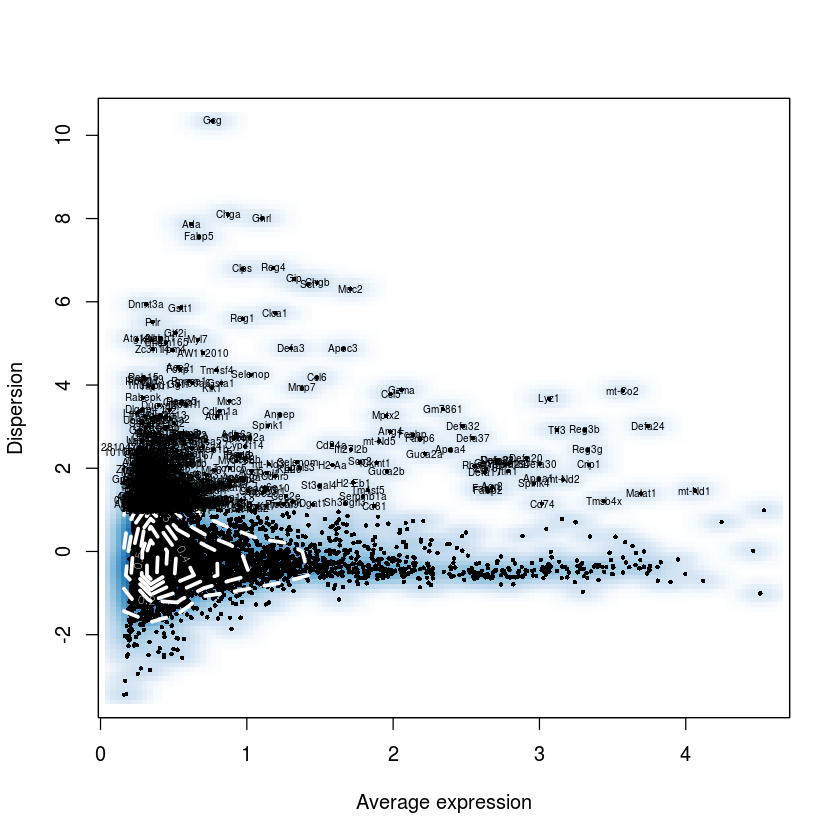

In [6]:
intestine = FindVariableGenes(intestine, x.low.cutoff = 0.1)

In [7]:
intestine <- ScaleData(intestine, genes.use = intestine@var.genes, model.use = "negbinom")


Scaling data matrix


In [8]:
intestine <- RunPCA(intestine, pcs.compute = 30, weight.by.var = FALSE)

[1] "PC1"
 [1] "Anpep"   "Spink1"  "Rbp2"    "Apoc3"   "Apoa1"   "Mep1b"   "Ces2e"  
 [8] "Cyp4f14" "Ace2"    "Crip1"   "Dpep1"   "Ggt1"    "St3gal4" "Adh6a"  
[15] "Apoa4"   "Cst6"    "Fabp1"   "Krt20"   "Slc27a4" "Clec2h"  "Cndp2"  
[22] "Cyp3a13" "Slc26a6" "Mogat2"  "Sult2b1" "Slc51b"  "Lgals3"  "Cdhr5"  
[29] "Cox7a1"  "Guca2b" 
[1] ""
 [1] "Tmsb4x"   "Slc12a2"  "Tceal9"   "Cd24a"    "Sox4"     "Cd81"    
 [7] "Ceacam10" "Defa17"   "Defa22"   "Defa20"   "Top2a"    "Pclaf"   
[13] "Gm47283"  "Phgdh"    "Lyz1"     "Mcm5"     "Cbx5"     "Gart"    
[19] "Gm7861"   "Fxyd3"    "Defa29"   "Gkn3"     "Gm14851"  "Defa24"  
[25] "Defa37"   "Marcksl1" "Bex3"     "Prim1"    "Defa30"   "Defa21"  
[1] ""
[1] ""
[1] "PC2"
 [1] "Mmp7"     "Ccl6"     "Spink4"   "Agr2"     "Guca2a"   "Selenom" 
 [7] "Muc2"     "Clps"     "Itln1"    "Tff3"     "Defa17"   "Defa24"  
[13] "Ang4"     "Lrrc26"   "Tspan13"  "Fxyd3"    "Reg4"     "Fcgbp"   
[19] "Gm7861"   "Lyz1"     "Defa3"    "Defa30"   "Defa37"   "Hepac

In [9]:
intestine <- RunTSNE(intestine, dims.use = 1:30, do.fast = T)

In [10]:
intestine <- FindClusters(intestine, reduction.type = "pca", dims.use = 1:19, save.SNN = T)

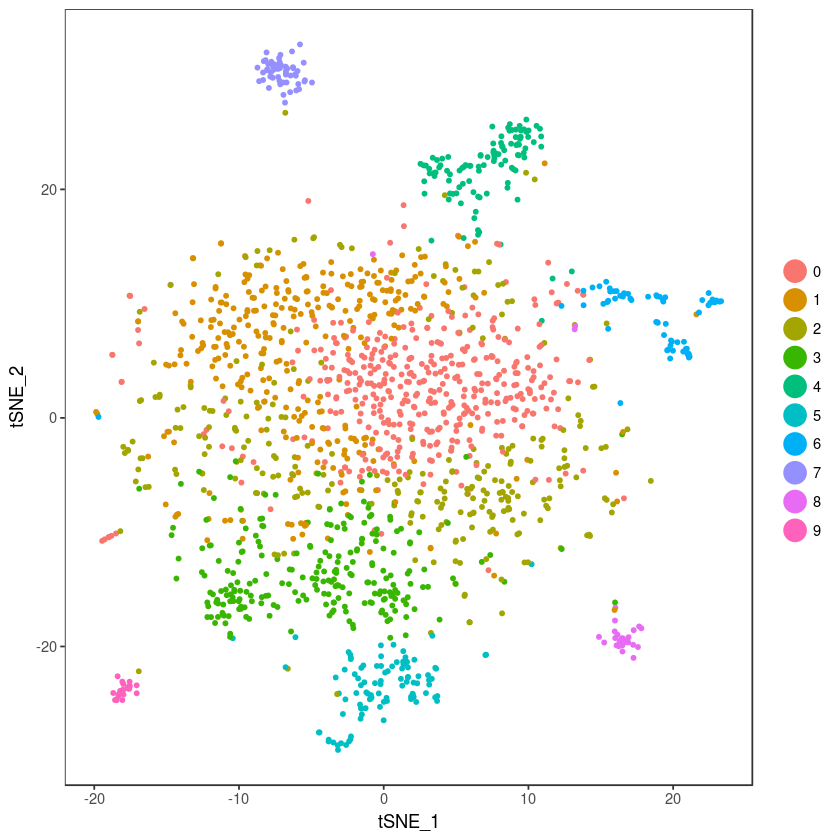

In [11]:
TSNEPlot(intestine)

# Find marker genes for each cluster

Check out a detailed explanation of the wilcoxin rank sum test [here](https://www.stat.auckland.ac.nz/~wild/ChanceEnc/Ch10.wilcoxon.pdf). 

Read more about the FindMarkers function in Seurat [here](http://satijalab.org/seurat/pbmc3k_tutorial_1_4.html) (scroll down to the section called "Finding differentially expressed genes"). Take a look at the command below, what can you learn from the documentation about how the differential expression is being calculated? 

In [12]:
cluster0.markers <- FindMarkers(intestine, ident.1 = 0, test.use = "wilcox", min.diff.pct = 0.2)

In [13]:
cluster0.markers

,p_val,avg_logFC,pct.1,pct.2,p_val_adj
Ifitm3,7.624227e-115,1.3089375,0.922,0.468,3.861671e-111
Slc12a2,1.521891e-94,0.9680474,0.803,0.265,7.708379e-91
Npm1,1.178825e-79,0.7449778,0.943,0.734,5.970749e-76
Ifitm2,3.737067e-76,0.7448503,0.936,0.658,1.892825e-72
Jaml,1.316522e-67,0.7851033,0.746,0.288,6.668186e-64
Clca3b,1.832216e-67,0.7360237,0.955,0.621,9.280173e-64
Impdh2,3.607802e-65,0.6925538,0.917,0.557,1.827352e-61
Gkn3,1.268345e-56,0.8511600,0.390,0.073,6.424165e-53
Gm15013,2.534745e-55,0.5982351,0.929,0.669,1.283848e-51
Gm2000,1.842700e-54,0.5381950,0.945,0.691,9.333276e-51


In [14]:
cluster1.markers <- FindMarkers(intestine, ident.1 = 1, test.use = "wilcox", min.diff.pct = 0.2)

In [15]:
head(cluster1.markers)

,p_val,avg_logFC,pct.1,pct.2,p_val_adj
Pclaf,1.183366e-93,1.0919992,0.803,0.232,5.993750e-90
Birc5,2.283672e-93,0.9738044,0.818,0.256,1.156680e-89
Hmgb2,3.901222e-85,0.9339223,0.979,0.629,1.975969e-81
Ube2c,1.707335e-81,1.2757662,0.736,0.251,8.647653e-78
Tuba1b,9.327010e-81,0.9714426,0.942,0.520,4.724131e-77
Cdk1,1.097410e-74,0.8049541,0.612,0.140,5.558381e-71


In [16]:
cluster2.markers <- FindMarkers(intestine, ident.1 = 2, test.use = "wilcox", min.diff.pct = 0.2)
head(cluster2.markers)

,p_val,avg_logFC,pct.1,pct.2,p_val_adj
Cystm1,6.668615e-38,-0.7867898,0.411,0.861,3.377653e-34
Itm2b,3.156175e-34,-0.6721481,0.442,0.903,1.598603e-30
Cox7a2l,1.769718e-30,-0.6184697,0.393,0.819,8.963623e-27
Atp6v0e,2.492275e-30,-0.4906442,0.200,0.681,1.262337e-26
Calm1,3.828957e-29,-0.5074397,0.674,0.953,1.939367e-25
Tmed10,1.361498e-28,-0.4291418,0.267,0.744,6.895987e-25


In [17]:
cluster3.markers <- FindMarkers(intestine, ident.1 = 3, test.use = "wilcox", min.diff.pct = 0.2)
head(cluster3.markers)

,p_val,avg_logFC,pct.1,pct.2,p_val_adj
St3gal4,4.708209e-102,1.4327295,0.913,0.310,2.384708e-98
Slc51a,6.883544e-90,1.1909538,0.694,0.138,3.486515e-86
Apol10a,3.676574e-86,1.0713671,0.810,0.202,1.862185e-82
Cdkn2b,1.960120e-74,0.9661297,0.649,0.147,9.928009e-71
Smim24,4.409111e-74,0.9527573,0.996,0.781,2.233215e-70
Car4,4.385861e-72,1.0976444,0.612,0.135,2.221439e-68


In [18]:
cluster4.markers <- FindMarkers(intestine, ident.1 = 4, test.use = "wilcox", min.diff.pct = 0.2)
head(cluster4.markers)

,p_val,avg_logFC,pct.1,pct.2,p_val_adj
Lrrc26,1.583021e-157,1.596420,0.832,0.050,8.017999e-154
Klk1,2.816929e-105,2.305280,0.897,0.140,1.426774e-101
Selenom,1.696861e-94,2.190224,0.991,0.231,8.594603e-91
Creb3l1,1.769964e-92,1.196322,0.692,0.071,8.964870e-89
Hepacam2,2.805490e-89,1.216550,0.804,0.100,1.420980e-85
Slc12a8,2.908705e-87,1.093841,0.664,0.068,1.473259e-83


In [19]:
cluster5.markers <- FindMarkers(intestine, ident.1 = 5, test.use = "wilcox", min.diff.pct = 0.2)
head(cluster5.markers)

,p_val,avg_logFC,pct.1,pct.2,p_val_adj
Ggt1,6.783361e-148,2.017631,0.837,0.054,3.435772e-144
Ace2,9.105776e-117,2.102835,0.776,0.069,4.612076e-113
Espn,1.070434e-106,1.793753,0.816,0.085,5.421748e-103
Dpep1,1.165813e-99,1.764803,0.745,0.076,5.904842e-96
Apoc3,3.415958e-91,3.561204,0.959,0.222,1.730183e-87
Slc27a4,4.724715e-91,2.159366,0.857,0.140,2.393068e-87


In [20]:
cluster6.markers <- FindMarkers(intestine, ident.1 = 6, test.use = "wilcox", min.diff.pct = 0.2)
head(cluster6.markers)

,p_val,avg_logFC,pct.1,pct.2,p_val_adj
Tm4sf4,3.317120e-74,2.114279,0.864,0.112,1.680121e-70
Ddc,1.653402e-51,1.698851,0.909,0.223,8.374479e-48
Rph3al,5.222609e-51,1.269371,0.636,0.087,2.645251e-47
Hepacam2,3.324286e-50,1.480480,0.742,0.120,1.683751e-46
Fxyd3,6.284053e-47,1.558250,0.939,0.235,3.182873e-43
Marcksl1,1.063996e-46,1.874651,0.833,0.197,5.389138e-43


In [21]:
cluster7.markers <- FindMarkers(intestine, ident.1 = 7, test.use = "wilcox", min.diff.pct = 0.2)
head(cluster7.markers)

,p_val,avg_logFC,pct.1,pct.2,p_val_adj
Defa3,1.565014e-106,4.072390,0.929,0.078,7.926794e-103
Clps,3.168435e-98,3.331068,0.929,0.087,1.604812e-94
Mmp7,1.722357e-71,2.936349,0.982,0.160,8.723738e-68
Gm7861,4.459134e-71,4.767552,1.000,0.184,2.258551e-67
Ang4,7.824410e-60,4.406231,0.982,0.226,3.963064e-56
Mptx2,1.039870e-59,4.544101,0.946,0.198,5.266939e-56


Let's save all of these results to a file using the write.table function 

In [22]:
cluster1.markers['Dmbt1',]

,p_val,avg_logFC,pct.1,pct.2,p_val_adj
Dmbt1,4.124187e-20,0.3169442,0.876,0.608,2.088901e-16


In [23]:
markers_to_save <- list(
    cluster0.markers, 
    cluster1.markers, 
    cluster2.markers, 
    cluster3.markers, 
    cluster4.markers, 
    cluster5.markers, 
    cluster6.markers, 
    cluster7.markers
)

i <- 0
for (marker in markers_to_save) {
    write.table(as.data.frame(marker), file=paste0(output_dir,"cluster",i,"_markers.csv"), sep=',')
    i <- i+1
}

**Visual inspection of the results**

Let's take a look at the top hit (sorted on smallest adjusted p value) for each result and plot violins. We can also overlay the expression values on the cells visualized with tSNE.

Warning message:
"'vlnPlot' is deprecated.
Use 'VlnPlot' instead.
See help("Deprecated") and help("Seurat-deprecated")."

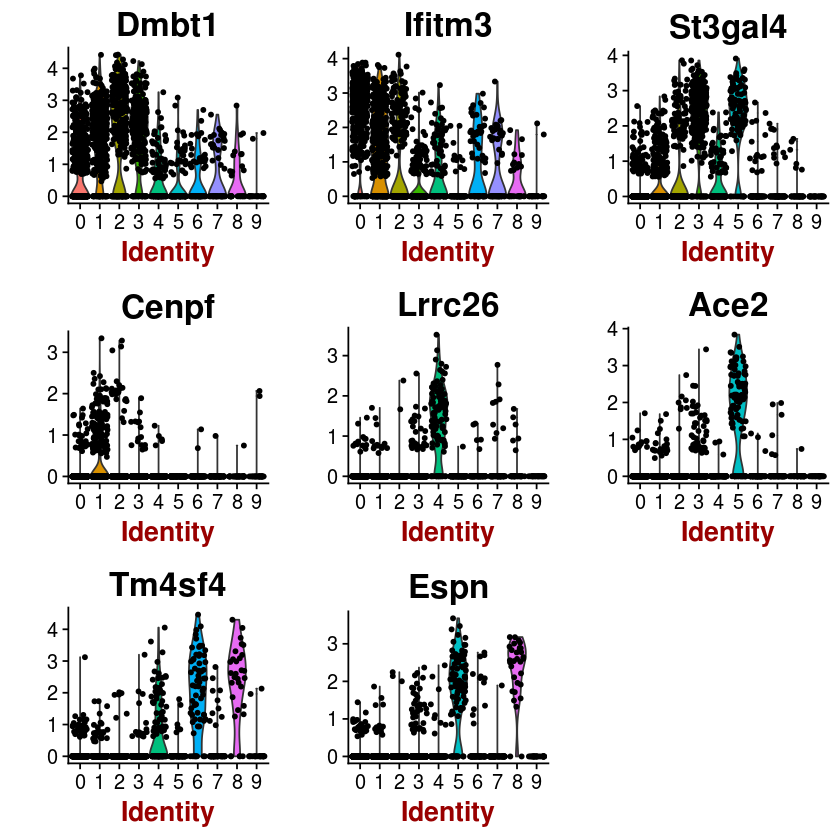

In [24]:
par(mfrow=c(1,2))

genes.viz=c('Dmbt1','Ifitm3','St3gal4','Cenpf','Lrrc26','Ace2','Tm4sf4','Espn')
vlnPlot(intestine, genes.viz)

Warning message:
"'feature.plot' is deprecated.
Use 'FeaturePlot' instead.
See help("Deprecated") and help("Seurat-deprecated")."

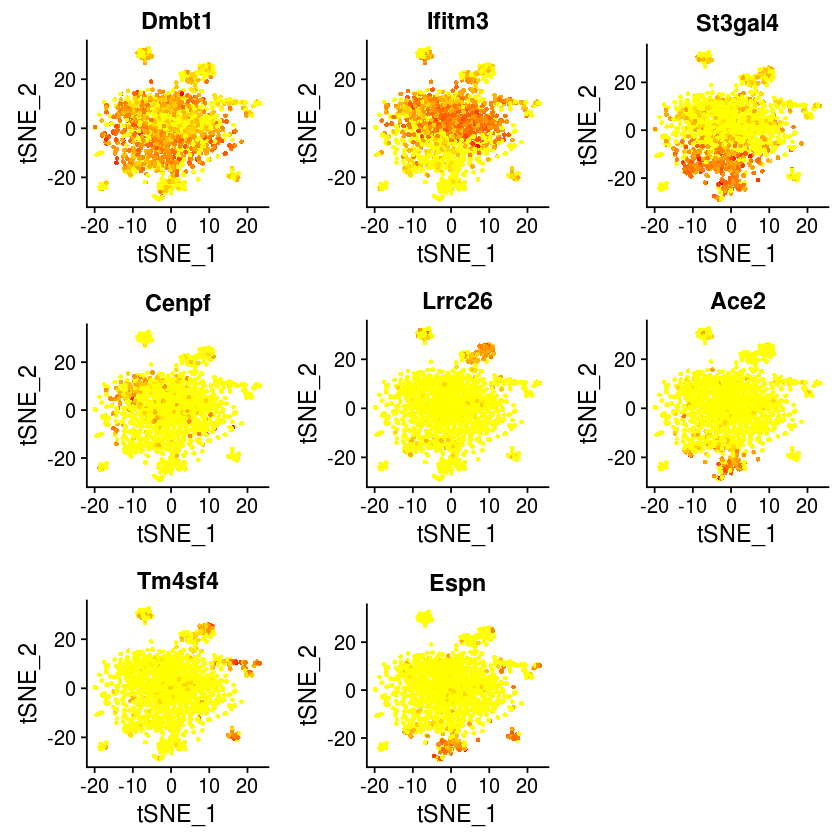

In [25]:
feature.plot(intestine,genes.viz,pt.size = 1)